In [1]:
%cd '/mnt/scratch-lustre/horlaville/clara_limlam/limCode2020-master_clara_2/'

/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{tgheros}\\usepackage{sansmath}\\sansmath'

# zdex beam runs:

In [5]:
# loading intensity space : 
beam_center = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/beam_center.npy')

# zdex, beam = 0 pix :
beam00_zdex04 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_basis.npy')
beam00_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_zdex0-3.npy')
beam00_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_zdex0-5.npy')
# zdex, beam = 0.5 pix :
beam05_zdex04 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_basis.npy')
beam05_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_zdex0-3.npy')
beam05_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_zdex0-5.npy')
# zdex, beam = 1 pix :
beam10_zdex04 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_basis.npy')
beam10_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_zdex0-3.npy')
beam10_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_zdex0-5.npy')
# zdex, beam = 1.5 pix :
beam15_zdex04 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_basis.npy')
beam15_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_zdex0-3.npy')
beam15_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_zdex0-5.npy')

/tmp/ipykernel_1147886/2048844814.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beam_center, - beam00_zdex04*(np.log10(beam00_zdex05/beam00_zdex04) - np.log10(beam00_zdex03/beam00_zdex04))/0.2, label='pix=0.0')
/tmp/ipykernel_1147886/2048844814.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - beam00_zdex04*(np.log10(beam00_zdex05/beam00_zdex04) - np.log10(beam00_zdex03/beam00_zdex04))/0.2, label='pix=0.0')
/tmp/ipykernel_1147886/2048844814.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(beam_center, - beam00_zdex04*(np.log10(beam00_zdex05/beam00_zdex04) - np.log10(beam00_zdex03/beam00_zdex04))/0.2, label='pix=0.0')


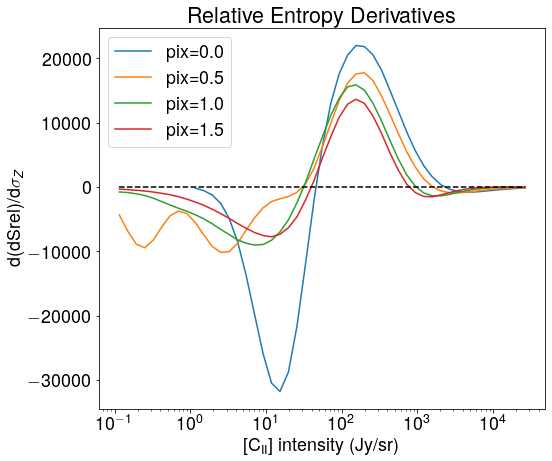

In [17]:
plt.plot(beam_center, - beam00_zdex04*(np.log10(beam00_zdex05/beam00_zdex04) - np.log10(beam00_zdex03/beam00_zdex04))/0.2, label='pix=0.0')
plt.plot(beam_center, - beam05_zdex04*(np.log10(beam05_zdex05/beam05_zdex04) - np.log10(beam05_zdex03/beam05_zdex04))/0.2, label='pix=0.5')
plt.plot(beam_center, - beam10_zdex04*(np.log10(beam10_zdex05/beam10_zdex04) - np.log10(beam10_zdex03/beam10_zdex04))/0.2, label='pix=1.0')
plt.plot(beam_center, - beam15_zdex04*(np.log10(beam15_zdex05/beam15_zdex04) - np.log10(beam15_zdex03/beam15_zdex04))/0.2, label='pix=1.5')

plt.xlabel(r'$\rm{[C_{II}]}$ intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\sigma_Z$')
plt.title('Relative Entropy Derivatives')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

# alpha_cii beam runs:

In [8]:
# acii, beam = 0 pix :
beam00_acii24 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_basis.npy')
beam00_acii20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_acii0-020.npy')
beam00_acii28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_acii0-028.npy')
# acii, beam = 0.5 pix :
beam05_acii24 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_basis.npy')
beam05_acii20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_acii0-020.npy')
beam05_acii28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_acii0-028.npy')
# acii, beam = 1 pix :
beam10_acii24 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_basis.npy')
beam10_acii20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_acii0-020.npy')
beam10_acii28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_acii0-028.npy')
# acii, beam = 1.5 pix :
beam15_acii24 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_basis.npy')
beam15_acii20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_acii0-020.npy')
beam15_acii28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_acii0-028.npy')

/tmp/ipykernel_1147886/2277655467.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - beam00_acii24*(np.log10(beam00_acii28/beam00_acii24) - np.log10(beam00_acii20/beam00_acii24))/0.008, label='pix=0.0')
/tmp/ipykernel_1147886/2277655467.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beam_center, - beam00_acii24*(np.log10(beam00_acii28/beam00_acii24) - np.log10(beam00_acii20/beam00_acii24))/0.008, label='pix=0.0')


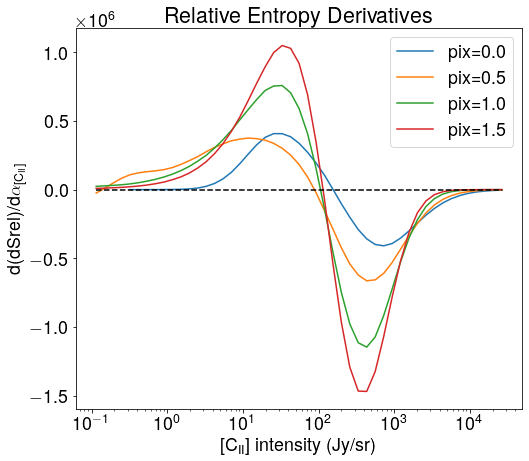

In [16]:
plt.plot(beam_center, - beam00_acii24*(np.log10(beam00_acii28/beam00_acii24) - np.log10(beam00_acii20/beam00_acii24))/0.008, label='pix=0.0')
plt.plot(beam_center, - beam05_acii24*(np.log10(beam05_acii28/beam05_acii24) - np.log10(beam05_acii20/beam05_acii24))/0.008, label='pix=0.5')
plt.plot(beam_center, - beam10_acii24*(np.log10(beam10_acii28/beam10_acii24) - np.log10(beam10_acii20/beam10_acii24))/0.008, label='pix=1.0')
plt.plot(beam_center, - beam15_acii24*(np.log10(beam15_acii28/beam15_acii24) - np.log10(beam15_acii20/beam15_acii24))/0.008, label='pix=1.5')

plt.xlabel(r'$\rm{[C_{II}]}$ intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\alpha_{\rm{[C_{II}]}}$')
plt.title('Relative Entropy Derivatives')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

# alpha_mhi beam runs:

In [12]:
# amhi, beam = 0 pix :
beam00_amhi74 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_basis.npy')
beam00_amhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_mhi0-68.npy')
beam00_amhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_mhi0-80.npy')
# amhi, beam = 0.5 pix :
beam05_amhi74 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0_pix/n_avg_basis.npy')
beam05_amhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_mhi0-68.npy')
beam05_amhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/0-5_pix/n_avg_mhi0-80.npy')
# amhi, beam = 1 pix :
beam10_amhi74 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_basis.npy')
beam10_amhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_mhi0-68.npy')
beam10_amhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1_pix/n_avg_mhi0-80.npy')
# amhi, beam = 1.5 pix :
beam15_amhi74 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_basis.npy')
beam15_amhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_mhi0-68.npy')
beam15_amhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/1-5_pix/n_avg_mhi0-80.npy')

/tmp/ipykernel_1147886/753545069.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(beam_center, - beam00_amhi74*(np.log10(beam00_amhi80/beam00_amhi74) - np.log10(beam00_amhi68/beam00_amhi74))/0.12, label='pix=0.0')
/tmp/ipykernel_1147886/753545069.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(beam_center, - beam05_amhi74*(np.log10(beam05_amhi80/beam05_amhi74) - np.log10(beam05_amhi68/beam05_amhi74))/0.12, label='pix=0.5')
/tmp/ipykernel_1147886/753545069.py:2: RuntimeWarning: invalid value encountered in subtract
  plt.plot(beam_center, - beam05_amhi74*(np.log10(beam05_amhi80/beam05_amhi74) - np.log10(beam05_amhi68/beam05_amhi74))/0.12, label='pix=0.5')


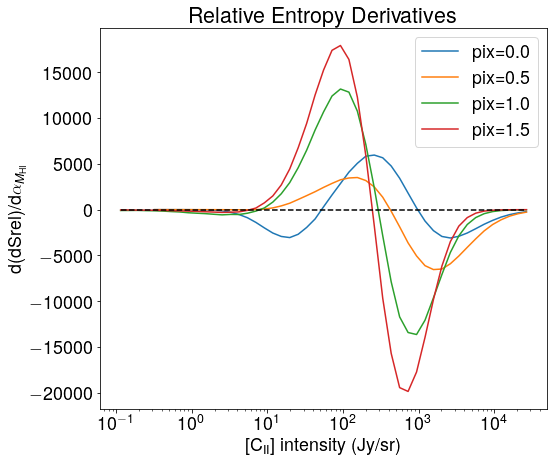

In [15]:
plt.plot(beam_center, - beam00_amhi74*(np.log10(beam00_amhi80/beam00_amhi74) - np.log10(beam00_amhi68/beam00_amhi74))/0.12, label='pix=0.0')
plt.plot(beam_center, - beam05_amhi74*(np.log10(beam05_amhi80/beam05_amhi74) - np.log10(beam05_amhi68/beam05_amhi74))/0.12, label='pix=0.5')
plt.plot(beam_center, - beam10_amhi74*(np.log10(beam10_amhi80/beam10_amhi74) - np.log10(beam10_amhi68/beam10_amhi74))/0.12, label='pix=1.0')
plt.plot(beam_center, - beam15_amhi74*(np.log10(beam15_amhi80/beam15_amhi74) - np.log10(beam15_amhi68/beam15_amhi74))/0.12, label='pix=1.5')

plt.xlabel(r'$\rm{[C_{II}]}$ intensity (Jy/sr)')
plt.ylabel(r'd(dSrel)/d$\alpha_{{M_{\rm{HI}}}}$')
plt.title('Relative Entropy Derivatives')
plt.xscale('log')

plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

plt.legend()

# beam size = 2 pixels:

In [18]:
'/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/'

'/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam_debug/2_pix/'